In [12]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import matplotlib.pyplot as plt

2.3.0


11493376/11490434 [==============================] - 0s 0us/step


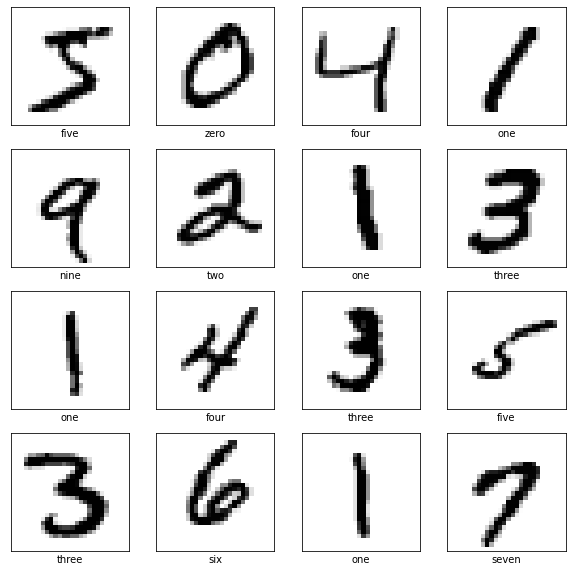

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
class_names = ['zero', 'one', 'two', 'three', 'four', 'five','six', 'seven', 'eight', 'nine']
plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
IMG_SIZE = (28, 28, 1)
model = Sequential()
model.add(Input(shape=IMG_SIZE))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
train_images = train_images.reshape(60000, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1).astype('float32') / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10) 

logdir = './logs/func-mnistFC'
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])

Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 2.3450 - accuracy: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1836 - accuracy: 0.9439 - val_loss: 0.1025 - val_accuracy: 0.9672
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0806 - accuracy: 0.9751 - val_loss: 0.0812 - val_accuracy: 0.9738
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0816 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0776 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 

In [18]:
%load_ext tensorboard
%tensorboard --logdir ./logs/func-mnistFC
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy = {0:.2f}%'.format(test_accuracy*100.0))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 108), started 0:05:59 ago. (Use '!kill 108' to kill it.)

<IPython.core.display.Javascript object>

313/313 - 1s - loss: 0.1025 - accuracy: 0.9800

Test accuracy = 98.00%
